In [2]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

def load_data(folder, image_size=(64, 64)): # Reduced image size
    X, y = [], []
    class_names = ['NORMAL', 'PNEUMONIA']
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(folder, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = imread(img_path, as_gray=True)
            img_resized = resize(img, image_size, anti_aliasing=True).flatten() # Resize image
            X.append(img_resized)
            y.append(label)
    return np.array(X), np.array(y)

train_dir = 'data/train'
test_dir = 'data/test'

# Load data
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)


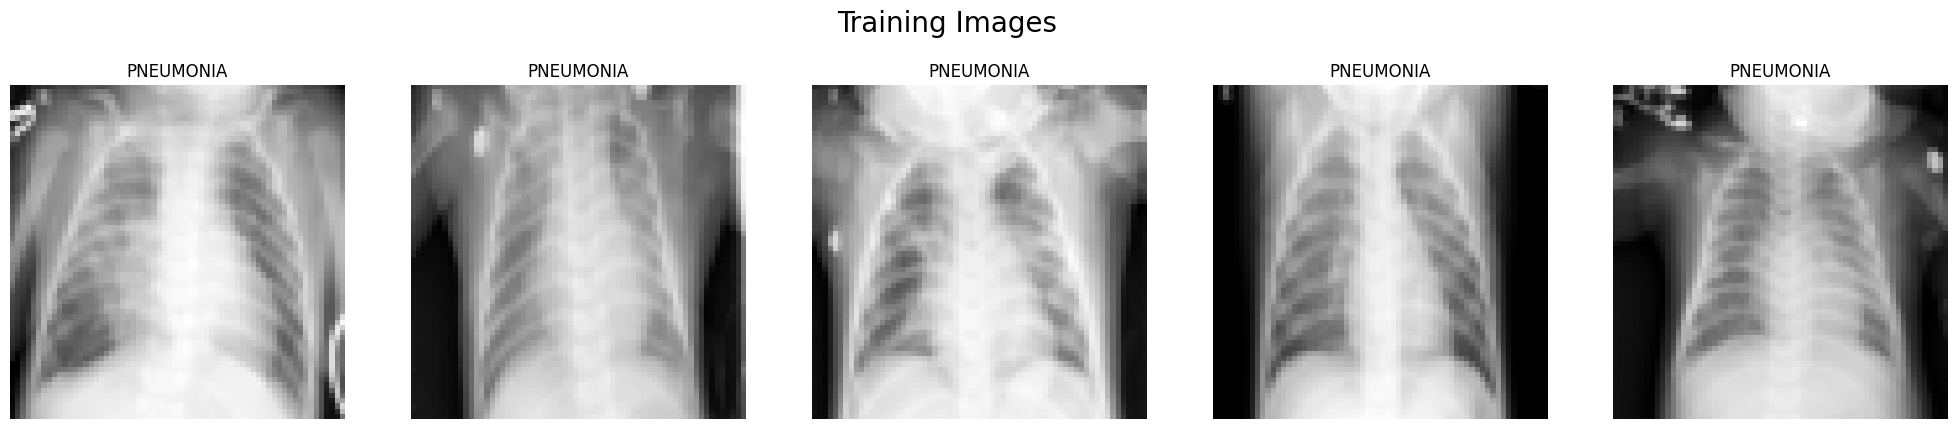

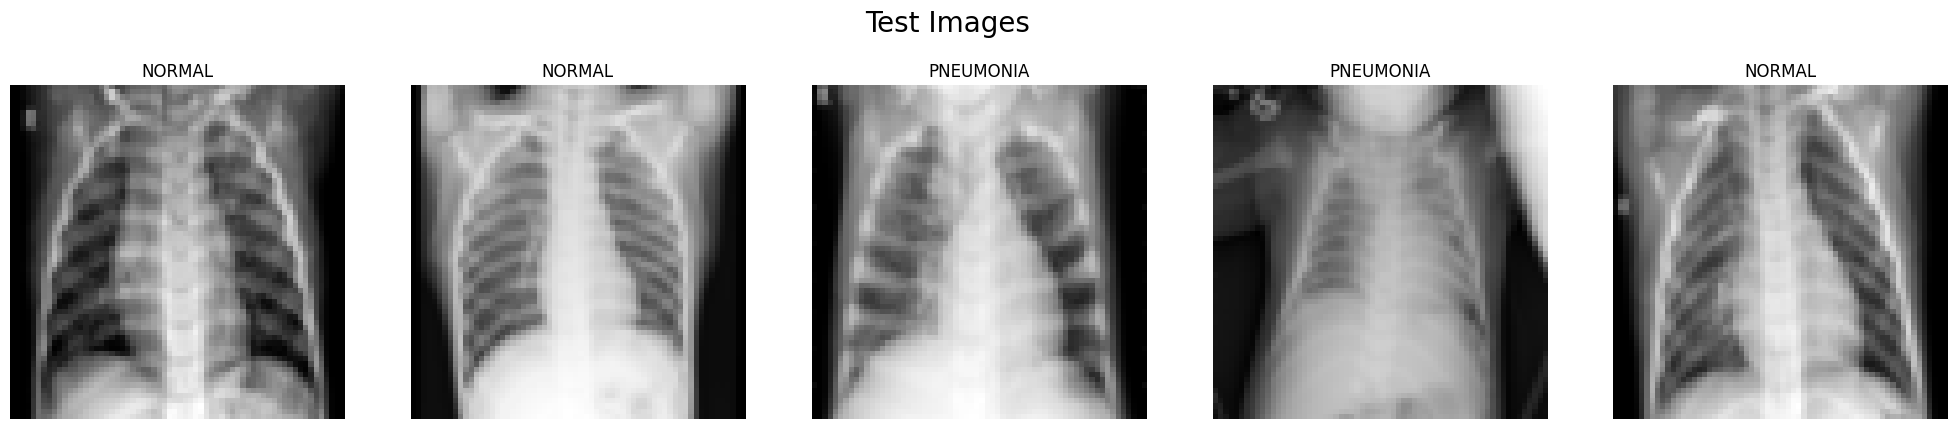

In [12]:
import matplotlib.pyplot as plt
import random

def display_images(images, labels, title, class_names, num_samples=5):
    figure, axes = plt.subplots(1, num_samples, figsize=(5*num_samples, 5))  # Increase the size of each subplot
    plt.suptitle(title, size=20)
    for ax in axes:
        idx = random.randint(0, len(images) - 1)
        img = images[idx].reshape(64, 64)
        label = class_names[int(labels[idx])]
        ax.imshow(img, cmap="gray")
        ax.set_title(label)
        ax.axis("off")

class_names = ['NORMAL', 'PNEUMONIA']
display_images(X_train, y_train, "Training Images", class_names)
display_images(X_test, y_test, "Test Images", class_names)
plt.show()


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)
y_pred_proba_lr = model.predict_proba(X_test)[:, 1]

roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
print("ROC-AUC score:", roc_auc_lr)

print("Classification report:")
print(classification_report(y_test, y_pred_lr))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))

ROC-AUC score: 0.907034845496384
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.35      0.51       234
           1       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624

Confusion matrix:
[[ 81 153]
 [  5 385]]


In [14]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# We create a pipeline to scale our data and then train the SVM
clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear'))

# Train the SVM
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_svm = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_svm))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_svm))

# Calculate the ROC-AUC score
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
print("ROC-AUC score:", roc_auc_svm)


              precision    recall  f1-score   support

           0       0.93      0.35      0.51       234
           1       0.72      0.98      0.83       390

    accuracy                           0.75       624
   macro avg       0.82      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624

[[ 82 152]
 [  6 384]]
ROC-AUC score: 0.6675213675213676


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("ROC-AUC score:", roc_auc_knn)
print("Classification report:\n", classification_report_knn)
print("Confusion matrix:\n", confusion_matrix_knn)


ROC-AUC score: 0.6978632478632478
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.41      0.57       234
           1       0.74      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624

Confusion matrix:
 [[ 95 139]
 [  4 386]]


In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate the model
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)

# Predict on the test set
y_pred_lda = lda.predict(X_test)

# Evaluate the model
roc_auc_lda = roc_auc_score(y_test, y_pred_lda)
f1_score_lda = f1_score(y_test, y_pred_lda)
classification_report_lda = classification_report(y_test, y_pred_lda)
confusion_matrix_lda = confusion_matrix(y_test, y_pred_lda)

print("ROC-AUC score:", roc_auc_lda)
print("Classification report:\n", classification_report_lda)
print("Confusion matrix:\n", confusion_matrix_lda)


ROC-AUC score: 0.6397435897435898
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.44      0.51       234
           1       0.71      0.84      0.77       390

    accuracy                           0.69       624
   macro avg       0.67      0.64      0.64       624
weighted avg       0.68      0.69      0.68       624

Confusion matrix:
 [[102 132]
 [ 61 329]]


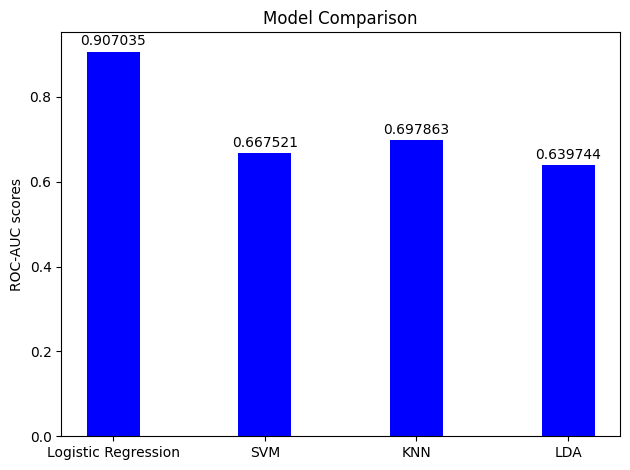

In [26]:
import matplotlib.pyplot as plt

# Assuming that roc_auc_scores is a dictionary with model names as keys and the respective ROC-AUC scores as values.
roc_auc_scores = {
    'Logistic Regression': roc_auc_lr,
    'SVM': roc_auc_svm,
    'KNN': roc_auc_knn,
    'LDA': roc_auc_lda
}

# Data to plot
n_models = len(roc_auc_scores.keys())
roc_auc_values = list(roc_auc_scores.values())

# Create a bar chart
fig, ax = plt.subplots()

# Define bar position and width
ind = np.arange(n_models)
width = 0.35

# Create bars
bars = ax.bar(ind, roc_auc_values, width, color='blue')

# Set labels and title
ax.set_ylabel('ROC-AUC scores')
ax.set_title('Model Comparison')
ax.set_xticks(ind)
ax.set_xticklabels(roc_auc_scores.keys())

# Function to attach a label on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%f' % float(height),
                ha='center', va='bottom')

# Attach labels
autolabel(bars)

# Show plot with tight layout
plt.tight_layout()
plt.savefig('model_comparison_roc.png')
plt.show()


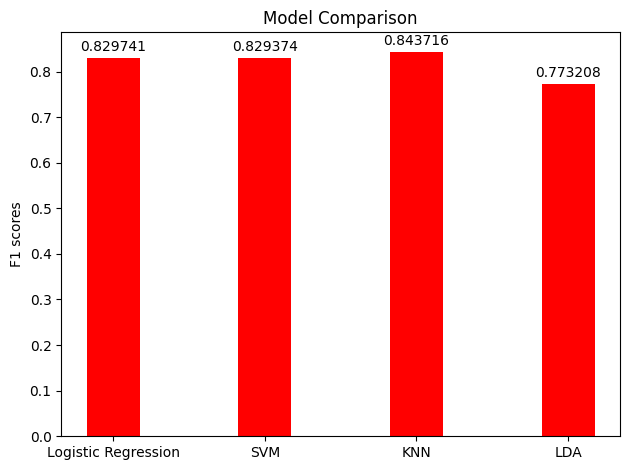

In [28]:

# Calculate F1 scores for each model
f1_scores = {
    'Logistic Regression': f1_score_lr,
    'SVM': f1_score_svm,
    'KNN': f1_score_knn,
    'LDA': f1_score_lda
}

# Data to plot
n_models = len(f1_scores.keys())
f1_values = list(f1_scores.values())

# Create a bar chart
fig, ax = plt.subplots()

# Define bar position and width
ind = np.arange(n_models)
width = 0.35

# Create bars
bars = ax.bar(ind, f1_values, width, color='red')

# Set labels and title
ax.set_ylabel('F1 scores')
ax.set_title('Model Comparison')
ax.set_xticks(ind)
ax.set_xticklabels(f1_scores.keys())

# Function to attach a label on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%f' % float(height),
                ha='center', va='bottom')

# Attach labels
autolabel(bars)

# Show plot with tight layout
plt.tight_layout()
plt.savefig('model_comparison_f1.png')
plt.show()
